<a href="https://colab.research.google.com/github/JCaesarLG/ML-Projects/blob/main/Car_insurance_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans

In [14]:
insurance = pd.read_csv("/content/drive/MyDrive/Raw_Data/car_insurance_premium_dataset.csv")
insurance.shape

(1000, 7)

In [15]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Driver Age                 1000 non-null   int64  
 1   Driver Experience          1000 non-null   int64  
 2   Previous Accidents         1000 non-null   int64  
 3   Annual Mileage (x1000 km)  1000 non-null   int64  
 4   Car Manufacturing Year     1000 non-null   int64  
 5   Car Age                    1000 non-null   int64  
 6   Insurance Premium ($)      1000 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 54.8 KB


In [16]:
insurance.head(2)

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15


In [18]:
X = insurance.iloc[:,:-1].values
y = insurance.iloc[:,-1].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rg = RandomForestRegressor(n_estimators=100, random_state=42)
rg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
test_pred = rg.predict(X_test)
acc_score = r2_score(y_test, test_pred)
print(f"accuracy score for test is {acc_score}")

accuracy score for test is 0.9835190401401186


TRYING K-MEANS Clustering

In [25]:
wcss =[]

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

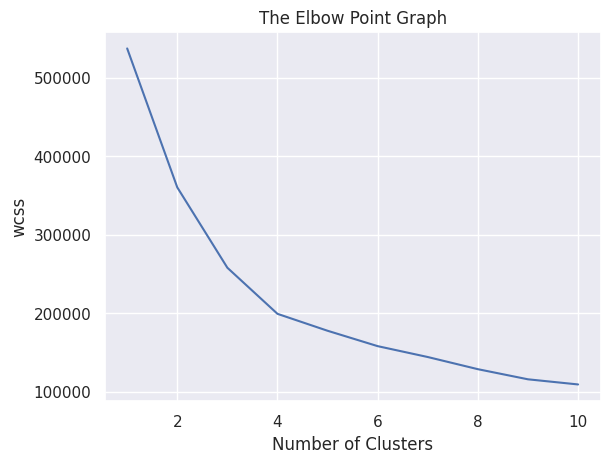

In [26]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [28]:
kmeans= KMeans(n_clusters=4, init='k-means++', random_state=0)

Y = kmeans.fit_predict(X)

print(Y)

[2 3 1 2 0 0 2 0 1 1 1 1 3 2 1 0 2 1 1 2 3 2 1 1 2 1 1 3 0 2 2 2 1 0 3 2 1
 2 0 3 1 2 0 0 3 1 1 1 1 0 3 3 0 2 1 2 3 1 1 2 2 1 1 1 3 0 2 0 2 3 2 0 3 0
 3 2 0 1 1 1 2 3 0 2 1 3 1 1 3 2 2 3 1 2 1 2 0 1 3 0 2 1 3 1 0 1 2 3 3 0 3
 2 2 2 0 1 1 0 2 3 3 3 2 3 2 3 3 1 2 3 1 2 2 3 1 0 0 0 3 1 2 3 0 1 0 3 2 0
 2 2 3 1 2 2 2 3 3 0 2 3 2 1 3 1 3 2 0 3 3 0 2 2 3 2 0 2 1 3 3 3 2 0 1 1 3
 1 3 0 0 3 1 3 3 3 2 2 1 3 3 1 2 0 2 1 0 3 1 0 1 3 1 2 2 3 1 1 1 3 3 3 0 2
 1 1 1 3 2 0 2 0 1 1 3 0 2 0 0 0 3 1 1 2 0 2 1 1 0 3 1 2 2 3 2 1 2 0 1 3 2
 3 2 3 3 3 0 0 3 2 0 1 3 1 1 3 3 1 2 2 1 3 1 0 1 0 2 0 1 1 2 3 2 1 2 3 2 2
 3 3 1 3 0 1 2 1 3 3 2 0 3 0 1 3 0 0 0 1 0 3 2 0 3 1 2 3 3 2 3 0 2 3 2 0 3
 2 3 3 2 0 2 0 1 2 0 2 0 2 2 3 0 3 3 3 2 2 3 3 2 3 0 3 2 3 1 1 2 3 3 0 2 3
 2 2 2 3 1 0 0 2 1 3 1 2 3 0 3 2 2 0 2 2 3 2 0 0 1 2 2 0 1 0 2 0 1 0 3 0 2
 3 1 3 2 0 3 0 1 2 1 0 2 3 2 1 3 3 1 3 1 1 2 2 3 3 2 2 0 0 2 3 0 0 1 3 3 2
 2 2 0 1 1 1 2 2 3 2 3 3 3 1 1 3 1 3 3 1 0 3 1 3 0 2 0 3 0 2 3 3 0 1 0 3 2
 2 1 3 3 2 2 3 1 1 1 3 3 

In [31]:
centroids = kmeans.cluster_centers_
print("Cluster Centroids:")
print(centroids)

Cluster Centroids:
[[  29.15668203    8.35483871    2.56682028   17.49769585 1997.73732719
    27.26267281]
 [  28.95454545    6.87603306    2.58677686   17.81818182 2016.13636364
     8.86363636]
 [  52.12992126   21.30314961    2.5511811    18.16141732 1998.48031496
    26.51968504]
 [  52.26480836   20.45644599    2.56794425   18.15679443 2016.05923345
     8.94076655]]
